### Agent-Lab: Vision Document Agent

Objective of this notebook is evaluating and adapting the implementation of [Multi-modal Agent](https://python.langchain.com/docs/integrations/llms/ollama/#multi-modal) specialized on documents.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    OLLAMA_ENDPOINT="http://localhost:11434"
    OLLAMA_MODEL_TAG="llama3.2-vision:latest"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag",
    llm_tag="phi4-mini:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)

# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

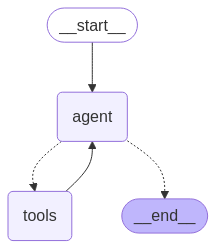

In [3]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [11]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Search: what is the relation between heaven and land in The Art of War Book?",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [12]:
print(result.keys())

dict_keys(['messages'])


In [13]:
print(result['messages'][-1].content)

The original text by Sun Tzu, known simply as "The Art of War," doesn't directly discuss concepts like 'heaven' or divine right related to governance over territory ('land'). It primarily focuses on military strategy rather than metaphysical relationships.

However, understanding the contextual relationship between Heaven (a spiritual/religious concept in Chinese culture implying moral authority and cosmic order) could be metaphorically interpreted through Sun Tzu's emphasis:
- Governance aligned with 'Heaven' as an ideal reflects justice/moral righteousness—suggesting rulers should align their strategies to reflect higher wisdom/ethical principles akin heavenly ways.
  
In practice, it implies that the ruler (or general strategist in warfare terms) acts justly and wisely — ideally following moral laws perceived analogous from Heaven's order.

To directly quote Sun Tzu:
> "He who knows others is wise; he who understands himself is enlightened. The supreme art of war is to subdue enemie